# Metodo de Monte Carlo acierto y error


**PASO 1**. Genere una secuencia $\{U_j\}_{j=1}^{2N}$ de $2N$ números aleatorios.

In [157]:
from random import random

"""
  Esta funcion genera un par de numeros aleatorios con distribucion uniforme
  con a=0 y b=1
"""
def uniforme():
  return (random(),random())

# Pequeña prueba del codigo

for i in range(10):
  print(uniforme())


(0.32073346314847595, 0.6614892791338923)
(0.4335112246971, 0.30759152293618075)
(0.9097845261692644, 0.5338354647376665)
(0.8518730044819627, 0.9048573172969525)
(0.18641378624676852, 0.3574878191009959)
(0.43397503777816837, 0.7367146039646224)
(0.7787059021700228, 0.4848532391094571)
(0.717622087951484, 0.6710048386952917)
(0.5341209759948844, 0.4627583386679719)
(0.9191677041386811, 0.87033441062342)


**PASO 2**. Organice los números aleatorios en $N$ pares $(U_1,U_1^´),(U_2,U_2^´),...,(U_N,U_N^´)$ de cualquier forma tal que cada número aleatorio $U_j$ se use exactamente una vez.

In [177]:
N = 5 #por ejemplo

def lista(n):
  l = []
  for n in range(n):
    l.append(uniforme())
  return l

print(lista(N))

[(0.5402938697962761, 0.8283926356969222), (0.9627531064419885, 0.5562950662688374), (0.6756784335727458, 0.6196620656556265), (0.8986822376578869, 0.605265741343713), (0.3382495053372927, 0.7173523549472228)]


**PASO 3**. Calcule $X_i=a+U_i(b-a)\hspace{0.5cm}$ y $\hspace{0.5cm}g(X_i) , \hspace{0.5cm}i=1,2,...,N$

In [198]:
X = lambda a,b,u: a+u[0]*(b-a)

a = 0
b = 1

v = lista(N)

# pequeña prueba del codigo
for j in v:
  print(X(a,b,j))


0.702526062645113
0.4471337908601609
0.26486070759262625
0.5982196312359258
0.0950028316144439


A modo de ejemplo se va a utilizar la función $g(x)=-x^2+x$

In [102]:
import numpy as np

g = np.poly1d([-1,1,0])

for j in lista(N):
  print(X(a,b,j),g(X(a,b,j)))


0.6565037675557918 0.2255065707408427
0.9099106222201916 0.08197328179105537
0.1470804504720824 0.1254477915610117
0.8721852504922929 0.1114781393159892
0.12804955009707153 0.1116528628170091


Grafica de la función

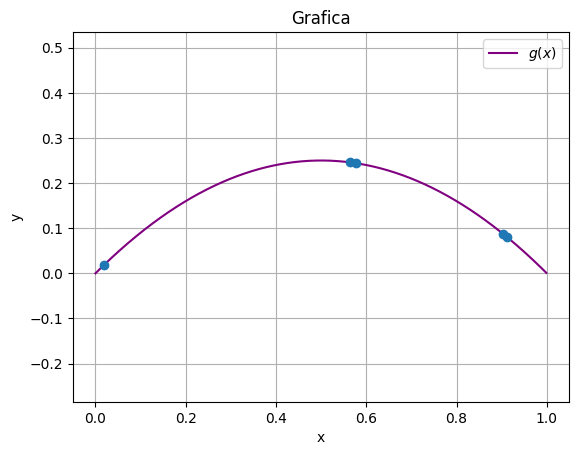

In [200]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

x = []
for i in lista(N):
  x.append(i[0])

y = list(map(g ,x))

x1 = np.arange(a,b,0.001)

plt.title('Grafica')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1,g(x1),color="purple",label="$g(x)$")
plt.plot(x,y,"o")
plt.legend(loc='upper right')
plt.axis('equal')
plt.grid()
plt.show()

**PASO 4**. Cuente el número de casos $N_H$ para los cuales $g(X_i)>cU_i^{'}$

In [352]:
c = 5

def NH(a,b,f,l):
  n = 0
  for i in l:
    if f(X(a,b,i))>c*i[1]:
      n+=1
  return n
print(NH(a,b,g,lista(N)))

35


**PASO 5**. Estime la integral $I$ por $\theta_1=c(b-a)\dfrac{N_H}{N}$

In [362]:
def I(a,b,c,n,f):
  n2=0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      n2+=1
  return c*(b-a)*(n2/n)

print(I(a,b,c,N,g))

0.185


Use el método de Acierto y Error para estimar las integrales:

$$(a) \int_{0}^{1}e^{e^x}dx$$
$$(b) \int_0^1\sqrt{(1-x^2)^3}dx$$

In [363]:
from math import exp

def I(a,b,c,n,f):
  n2=0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      n2+=1
  return c*(b-a)*(n2/n)

g1 = lambda x: exp(exp(x)) # funcion del inciso a

print(I(0,1,100,500000,g1))

6.3128


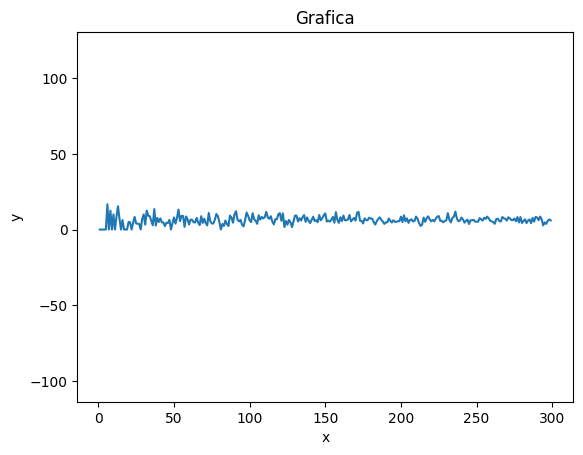

In [388]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots()

x = np.arange(1,300,1)
y = []
for i in range(len(x)):
  y.append(I(0,1,100,x[i],g1))

plt.title('Grafica')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
#plt.legend(loc='upper right')
plt.axis('equal')
plt.show()